# Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graphs

### Goal
The use of different representations of graphs and basic algorithms on graphs (Depth-first search and Breadth-first search)

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx  # for graph visualisation

Task I

In [250]:
# Generate a random adjacency matrix
n_V = 100
n_E = 200
n = n_E
adj_mtrx = np.zeros((n_V, n_V))

while n != 0:
    i, j = np.random.randint(0, 99), np.random.randint(0, 99)
    if i != j and adj_mtrx[i, j] != 1:
        adj_mtrx[i, j], adj_mtrx[j, i] = 1, 1
        n -= 1

print(f'Shape: {adj_mtrx.shape}, ones ammount: {np.sum(adj_mtrx)}')

Shape: (100, 100), ones ammount: 400.0


In [251]:
# Transfer the matrix into an adjacency list
adj_lst = {i: [] for i in range(n_V)}
for k, v in adj_lst.items():
    for i in range(n_V):
        adj_lst[k].append(i) if adj_mtrx[k, i] == 1 else next

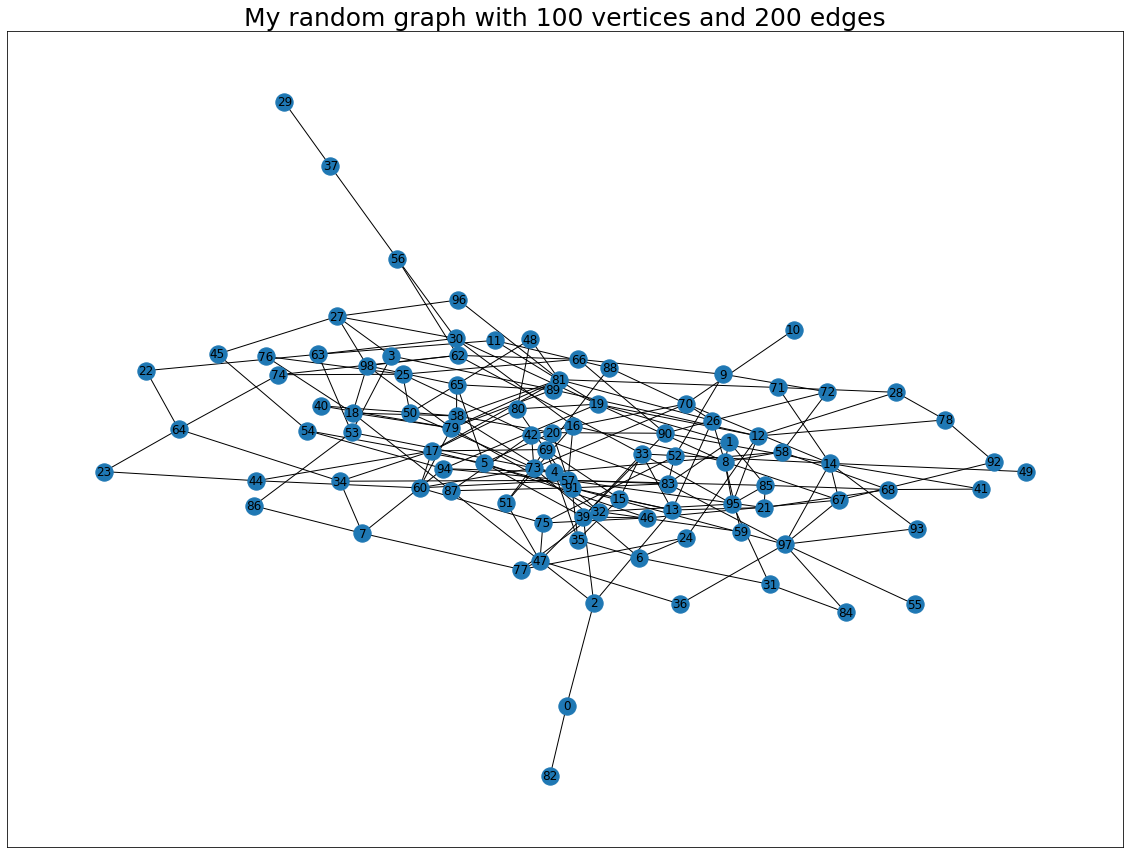

 --- Random adjacency matrix rows ---
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 0.]]
 
 --- Random adjacency list rows ---
26 -> [8, 13, 70, 72, 81, 90] 
70 -> [10, 14, 26, 42, 73, 88]


In [253]:
# Visualize the graph
# Graph class
class GraphVisualization:
    def __init__(self, temp):
        self.visual = temp
    def visualize(self):
        G = nx.Graph()
        plt.figure(figsize=(20,15))
        plt.title(f'My random graph with {n_V} vertices and {n_E} edges',
                  fontsize=25)
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

# Run the graph drawing
lst = []
for k, v in adj_lst.items():
    lst.extend([[k, i] for i in v])
G = GraphVisualization(lst)
G.visualize()

print(' --- Random adjacency matrix rows ---')
print(adj_mtrx[np.random.randint(0, 99, size=2)])
print(' ')
print(' --- Random adjacency list rows ---')
k_rand = np.random.randint(0, 99, size=2) 
print(f'{k_rand[0]} -> {adj_lst[k_rand[0]]} \n{k_rand[1]} -> {adj_lst[k_rand[1]]}')

Task II

In [273]:
# Depth-first search to find connected components
def DFS(temp, v, visited, adj_lst):
    visited[v] = True  # Mark the current vertex as visited
    temp.append(v)  # Store the vertex to list
    
    # Repeat for all vertices adjacent to this vertex v
    for i in adj_lst[v]:
        if visited[i] == False:
            # Update the list
            temp = DFS(temp, i, visited, adj_lst)
    return temp

def connectedComponents(V, adj_lst):
    visited = []
    cc = []
    for i in range(V):
        visited.append(False)
    for v in range(V):
        if visited[v] == False:
            temp = []
            cc.append(DFS(temp, v, visited, adj_lst))
    return cc

In [274]:
cc = connectedComponents(n_V, adj_lst)

In [275]:
# count unconnected vertices
num_cc = 0
num_uncc = 0
for i in cc:
    if len(i) > 1:
        num_cc += len(i)
    else:
        num_uncc += 1

print(f'Total number of connected vertices: {num_cc}\n\
Total number of unconnected vertices: {num_uncc}\n\
Components of the current graph:\n{cc}')

Total number of connected vertices: 97
Total number of unconnected vertices: 3
Components of the current graph:
[[0, 2, 13, 15, 33, 14, 41, 68, 21, 57, 16, 8, 1, 19, 11, 63, 22, 64, 23, 44, 17, 34, 7, 77, 24, 6, 31, 84, 97, 36, 47, 39, 5, 20, 38, 18, 76, 25, 42, 70, 10, 26, 72, 9, 52, 75, 46, 67, 92, 78, 12, 28, 71, 81, 48, 65, 50, 73, 60, 79, 32, 4, 35, 91, 80, 83, 87, 53, 3, 27, 30, 56, 37, 29, 62, 66, 90, 74, 98, 45, 54, 94, 96, 89, 86, 58, 69, 51, 88, 59, 95, 85, 40, 55, 93, 49, 82], [43], [61], [99]]


In [296]:
# Breadth-first search to find a shortest path
def BFS(s, e, n, g):
    # s - start node, s < n
    # e - end node, 0 <= e
    
    # do a BFS starting at node s
    prev = solve(s, n, g)
    
    # return reconstructed path from s -> e
    return reconstructPath(s, e, prev)

def solve(s, n, g):
    q = []  # queue initialization
    q.insert(0, s)  # enqueue s
    visited = [False for i in range(n)]
    visited[s] = True
    
    prev = [-1 for i in range(n)]
    while len(q) != 0:
        node = q.pop()
        neighbours = g[node]
        
        for nei in neighbours:
            if visited[nei] == False:
                q.insert(0, nei)
                visited[nei] = True
                prev[nei] = node
    return prev

def reconstructPath(s, e, prev):
    # reconstruct path going backwards from e
    path = []
    at = e
    while at != -1:
        path.append(at)
        at = prev[at]

    path.reverse()
    
    # If s and e are connected return the path
    if path[0] == s:
        return path
    return []

In [315]:
se = np.random.randint(0, 99, size=2)
print(f'Random start: {se[0]}, random end: {se[1]}')
way = BFS(se[0], se[1], n_V, adj_lst)
print(f'The founded shortest way is: {way}')
print(f'Lets print the founded way from {se[0]} to {se[1]}')
for i in way:
    print(f"{i} -> {adj_lst[i]}")
print('Finished!')

Random start: 27, random end: 71
The founded shortest way is: [27, 96, 81, 71]
Lets print the founded way from 27 to 71
27 -> [3, 30, 45, 96, 98]
96 -> [27, 81]
81 -> [17, 26, 38, 48, 71, 79, 96]
71 -> [14, 28, 81]
Finished!


Task III

In this Task we used undirected unweighted graph data structure. A Graph is a non-linear data structure consisting of vertices and edges. The vertices are sometimes also referred to as nodes and the edges are lines or arcs that connect any two nodes in the graph. More formally a Graph is composed of a set of vertices( V ) and a set of edges( E ). The graph is denoted by G(E, V). Undirected and unweight mean that the graph does not have directions between his verticles and all adges have the same weight